# Gradute Admission Analysis 

In [1]:
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Admission_Predict.csv')

## Print the data

In [3]:
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67


## Detect if there is empty value

In [4]:
df.isna().any()

Serial No.           False
GRE Score            False
TOEFL Score          False
University Rating    False
SOP                  False
LOR                  False
CGPA                 False
Research             False
Chance of Admit      False
dtype: bool

## See distribution of the data and check if there is an extreme value

In [5]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


## Correlation between training data and target data (good for filter unrelated data)

In [6]:
corr_matrix = df.corr()
corr_matrix['Chance of Admit '].abs().sort_values(ascending=False)

Chance of Admit      1.000000
CGPA                 0.873289
GRE Score            0.802610
TOEFL Score          0.791594
University Rating    0.711250
SOP                  0.675732
LOR                  0.669889
Research             0.553202
Serial No.           0.042336
Name: Chance of Admit , dtype: float64

## Data visualization, as plot we know that 'Serial No.' is a useless feature

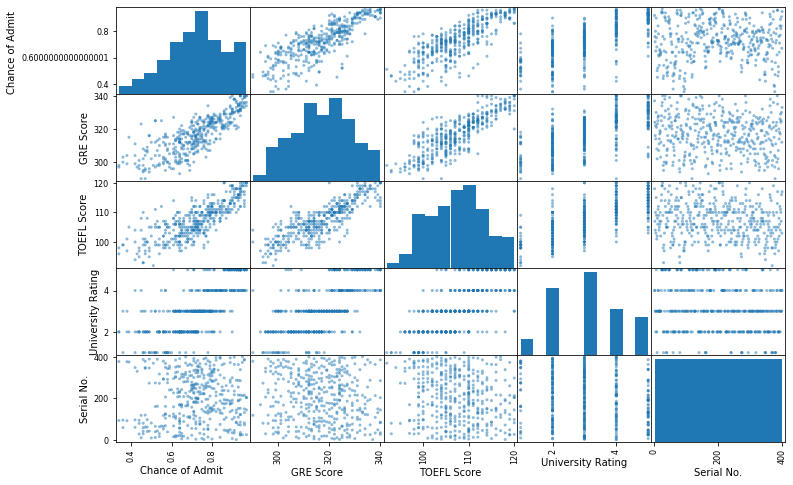

In [7]:
attributes = ['Chance of Admit ','GRE Score', 'TOEFL Score', 'University Rating', 'Serial No.']
scatter_matrix(df[attributes], figsize=(12, 8))
plt.show()

## Split feature data and target data

In [8]:
X = df.drop(columns = ['Serial No.', 'Chance of Admit ']).values
X.shape

(400, 7)

In [18]:
y = df['Chance of Admit '].values.reshape(-1,1)
y.shape

(400, 1)

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn import preprocessing

## Data normalization

In [11]:
X_scaled = preprocessing.scale(X)

## Analyze accuracy of the data in different polynoimal

In [12]:
acc_train = []
acc_val = []
def traning_diff_p(X_scaled, y):
    for i in range(5):
        poly = PolynomialFeatures(i)
        X_poly = poly.fit_transform(X_scaled)
        X_train, X_val, y_train,  y_val = train_test_split(X_poly, y, test_size=0.20, random_state = 43)
        lr = Ridge(alpha=1.0)
        lr.fit(X_train, y_train)
        accuracy_train = lr.score(X_train,y_train)
        accuracy_val = lr.score(X_val,y_val)
        acc_train.append(accuracy_train)
        acc_val.append(accuracy_val)
    return acc_train, acc_val

In [13]:
acc_train, acc_val = traning_diff_p(X_scaled, y)
print('training accuracy:{}'.format(acc_train))
print('validation accuracy:{}'.format(acc_val))

training accuracy:[0.0, 0.8142532524314473, 0.8339750413321105, 0.8738271562470752, 0.9365599141421607]
validation accuracy:[-0.0014630673411339945, 0.7501436207140979, 0.7596583229429689, 0.7006700397059553, 0.3697169729902322]


## Data visualization of data (Accuracy v.s. Polynominal)

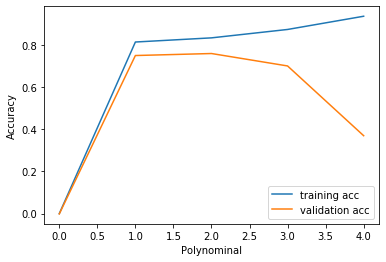

In [14]:
plt.plot(range(len(acc_train)), acc_train)
plt.plot(range(len(acc_val)), acc_val)
plt.ylabel('Accuracy')
plt.xlabel('Polynominal')
plt.legend(['training acc', 'validation acc'])
plt.show()

## Analyze accuracy of the data in different scale of regularization function(alpha)

In [15]:
def training_diff_alpha(X_scaled, y, alpha):
    acc_train = []
    acc_val = []
    for i in alpha:
        poly = PolynomialFeatures(3)
        X_poly = poly.fit_transform(X_scaled)
        X_train, X_val, y_train,  y_val = train_test_split(X_poly, y, test_size=0.20, random_state = 43)
        lr = Ridge(alpha = i)
        lr.fit(X_train, y_train)
        accuracy_train = lr.score(X_train,y_train)
        accuracy_val = lr.score(X_val,y_val)
        acc_train.append(accuracy_train)
        acc_val.append(accuracy_val)
    return acc_train, acc_val

In [16]:
alpha = list(range(0,500,100))
acc_train_a, acc_val_a = training_diff_alpha(X_scaled, y, alpha)
print('training accuracy:{}'.format(acc_train_a))
print('validation accuracy:{}'.format(acc_val_a))

training accuracy:[0.8654816369240331, 0.8387544711964113, 0.8268662136286489, 0.8178178655458909, 0.8101079558613569]
validation accuracy:[0.6207363405734614, 0.7669083596863299, 0.7608439625833364, 0.7543642315045078, 0.748246795788283]


## Data visualization of data (Accuracy v.s. Alpha)

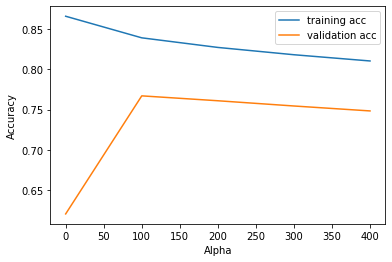

In [17]:
plt.plot(alpha, acc_train_a)
plt.plot(alpha, acc_val_a)
plt.ylabel('Accuracy')
plt.xlabel('Alpha')
plt.legend(['training acc', 'validation acc'])
plt.show()